In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#### 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。  
###### 1. このコンペティションでは何を予測する？目的変数は？    

顧客のデータから顧客の返済能力（返せるか？返せないか？）を予測する。目的変数：返済可否

###### 2. 企業がこのコンペティションを開催することで得られるメリットは？  

銀行など他の企業がカバーしていない人々の中から返済能力のある顧客を見つけ出し新しい顧客層を開発できる。

###### 3. データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

預金額、収入、職業、これまでの返済履歴&現在の借金額、家族構成、住まい

#### 【問題2】データの概観
データの概観を把握してください。
（例）
.head()、.info()、describe()などを使う  
欠損値の有無を見る  
クラスごとのデータ数をグラフに出す  
コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。 

In [2]:
data_home_credit = pd.read_csv("application_train.csv")
data_home_credit.info()
pd.options.display.max_columns = 122
data_home_credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

　問題1で予想した”預金額、収入、職業、これまでの返済履歴&現在の借金額、家族構成”のうち”収入：AMT_INCOME_TOTAL”, 	”住まい：NAME_HOUSING_TYPE”, ”職業：OCCUPATION_TYPE”　がデータセットに含まれている 

In [3]:
data_home_credit.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

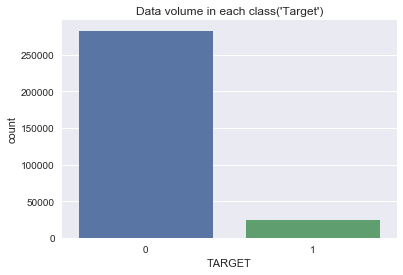

未返済率=8.78[%]


In [27]:
sb.countplot(x="TARGET", data=data_home_credit)
plt.title("Data volume in each class('Target')")
plt.show()
tmp = data_home_credit["TARGET"]
count_1 = (tmp==1).sum()
count_0 = (tmp==0).sum()
print("未返済率={:.2f}[%]".format((count_1/count_0)*100))

0:が返済された場合  
1:が返済されなかった場合
だと推測される。

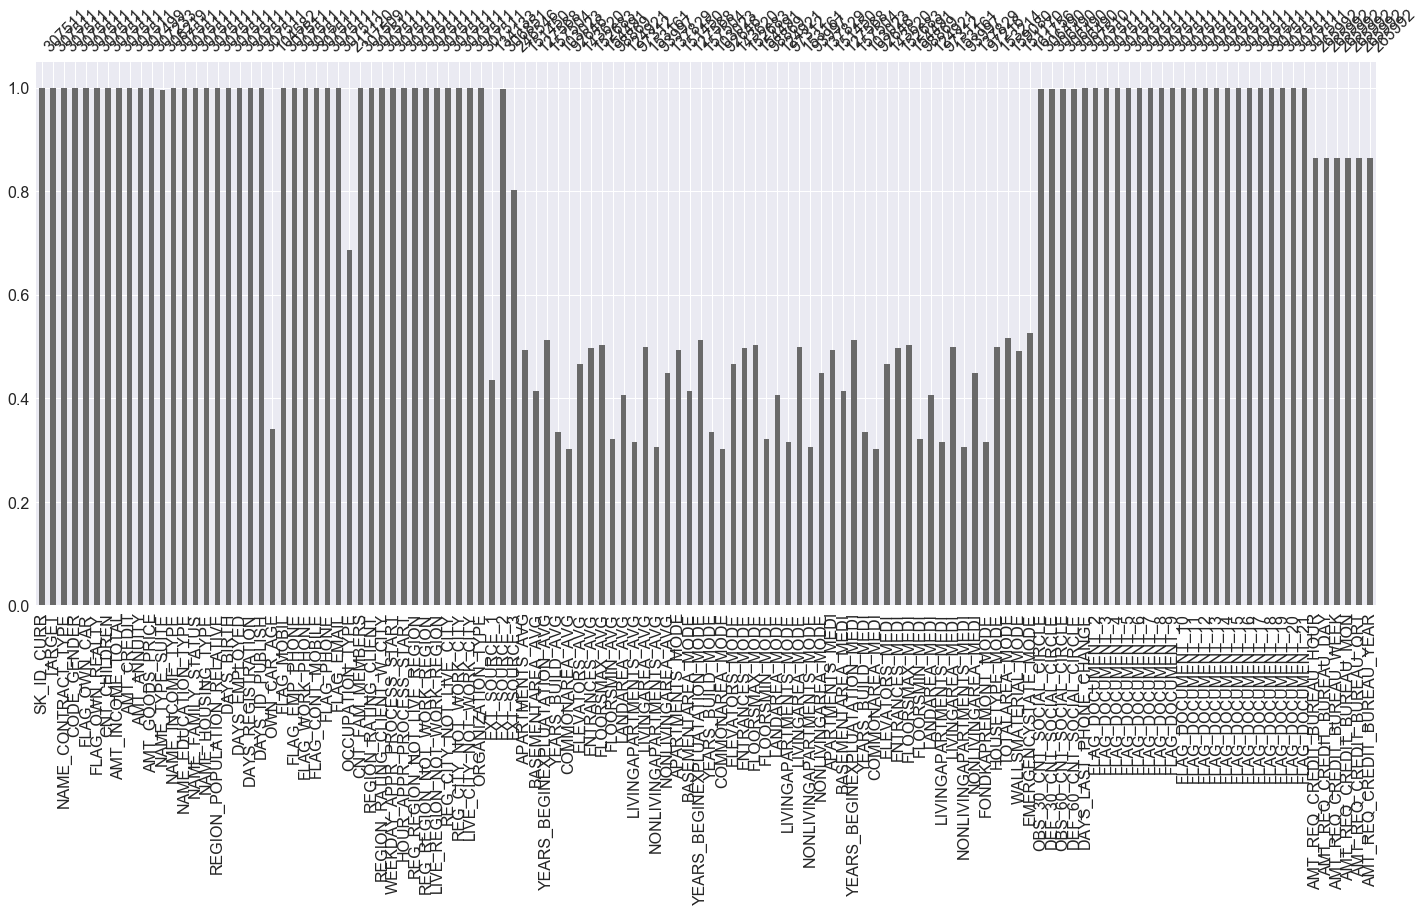

In [5]:
import missingno as msno
data_home_credit.isnull().sum()
msno.bar(data_home_credit)

In [24]:
total = len(data_home_credit)
sum_income = data_home_credit["AMT_INCOME_TOTAL"].isnull().sum()
sum_housing = data_home_credit["NAME_HOUSING_TYPE"].isnull().sum()
sum_occupation = data_home_credit["OCCUPATION_TYPE"].isnull().sum()

print("AMT_INCOME_TOTALデータ欠損数:{}　欠損率:{:.2f}[%]".format(sum_income, 100*sum_income/total))
print("NAME_HOUSING_TYPEデータ欠損数:{}  欠損率:{:.2f}[%]".format(sum_housing, 100*sum_housing/total))
print("OCCUPATION_TYPEデータ欠損数:{}  欠損率:{:.2f}[%]".format(sum_occupation, 100*sum_occupation/total))

AMT_INCOME_TOTALデータ欠損数:0　欠損率:0.00[%]
NAME_HOUSING_TYPEデータ欠損数:0  欠損率:0.00[%]
OCCUPATION_TYPEデータ欠損数:96391  欠損率:31.35[%]


選んだ特徴量の内"OCCUPATION_TYPE"は30%ほど欠損値を含でいる。

#### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

課題1. Incomeと返済率の関係を調べる  
課題2. NAME_HOUSING_TYPE, OCCUPATION_TYPEと返済率の関係を調べる（Object型データの扱い）  
課題3. 各パラメータに対する重要度の算出を行う（Pick upした３つの説明変数以外に重要なパラメータを探し出す。ランダムフォレスト）  

#### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。
課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

##### 課題1. Incomeと返済率の関係 
手順  
1.incomeをあるrangeに分ける  
2.そのincome range内で返済率を計算  
3.income rangeと返済率の関係をグラフ化し関係を調べる  

In [9]:
#データを抽出
data_to_use = data_home_credit[["TARGET","AMT_INCOME_TOTAL","NAME_HOUSING_TYPE","OCCUPATION_TYPE"]]
#print(data_to_use)

In [11]:
#incomeをbinningする（とりあえずmax min を10分割）
BIN = 10
bin_width = (int)((data_to_use["AMT_INCOME_TOTAL"].max() - data_to_use["AMT_INCOME_TOTAL"].min()) / BIN)
max_income = (int)(data_to_use["AMT_INCOME_TOTAL"].max())
min_income = (int)(data_to_use["AMT_INCOME_TOTAL"].min())
bins = [value for value in range(min_income, max_income, bin_width )]
#print(bins)
labels = [i for i in range(0, len(bins)-1) ]
#print(labels)
pd.cut(data_to_use["AMT_INCOME_TOTAL"], bins=bins, labels=labels)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
307481    0
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    0
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    0
307510    0
Name: AMT_INCOME_TOTAL, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]

max, minでrangeを決めた結果、ほとんどがrange 0（所得低）に分類されてしまった。==> incomeの分布をヒストグラム、Boxplotで調べてみる。

Max:117000000.0 Min:25650.0 Mean:168797.9


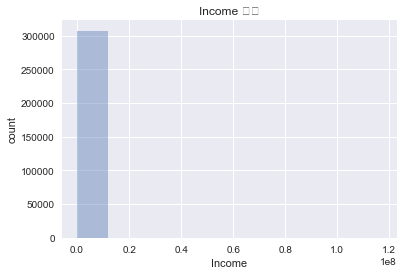

In [12]:
#incomeの分布を調べる
data_income = data_to_use["AMT_INCOME_TOTAL"]
#print(data_income)
print("Max:{} Min:{} Mean:{:.01f}".format(data_income.max(), data_income.min(), data_income.mean()))
#sb.distplot(data_income, kde=False, rug=False, bins=10, hist_kws={"range": [1E6,1E7]} )
sb.distplot(data_income, kde=False, rug=False, bins=10 )
plt.ylabel("count")
plt.title("Income 分布")
plt.xlabel("Income")

,TARGET,AMT_INCOME_TOTAL
count,307511.000000,3.075110e+05
mean,0.080729,1.687979e+05
std,0.272419,2.371231e+05
min,0.000000,2.565000e+04
25%,0.000000,1.125000e+05
50%,0.000000,1.471500e+05
75%,0.000000,2.025000e+05
max,1.000000,1.170000e+08


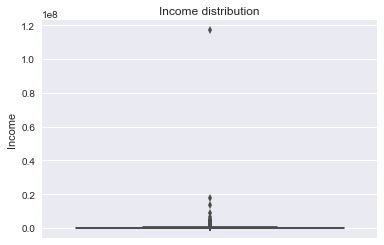

In [13]:
#sb.distplot(data_income.apply(np.log), kde=False, rug=False, bins=25)
sb.boxplot(y='AMT_INCOME_TOTAL', data=data_to_use)
plt.ylabel("Income")
plt.title("Income distribution")
data_to_use.describe()

max側の外れ値の値が大きいことがわかった(incomeの75%点とmaxの値が1000倍も違う)。外れ値に引っ張られてしまいmax, minではbinをうまく設定できない。  
==> 四分位範囲からbin幅を決定する。

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


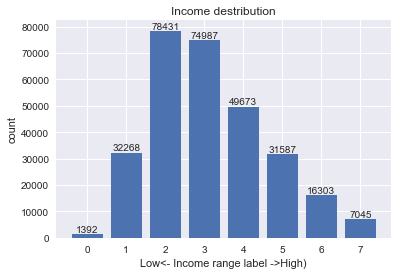

Income range label=0 : income range=0~42187
Income range label=1 : income range=42187~84374
Income range label=2 : income range=84374~126561
Income range label=3 : income range=126561~168748
Income range label=4 : income range=168748~210935
Income range label=5 : income range=210935~253122
Income range label=6 : income range=253122~295309
Income range label=7 : income range=295309~337496


In [14]:
#bin幅の決定のため四分位数を調べる。（外れ値を除く）
data_info = data_to_use.describe()
bin_min = data_info.loc["25%", "AMT_INCOME_TOTAL"]
bin_max = data_info.loc["75%", "AMT_INCOME_TOTAL"]
IQR = bin_max - bin_min
bin_min = bin_min-IQR*1.5 if bin_min > IQR*1.5 else 0 #これ以下は外れ値とする。(0を最低値とする)
bin_max += IQR*1.5 #これ以上は外れ値とする

BIN = 8
bin_width = (int)((bin_max - bin_min) / BIN)
bins = [value for value in range((int)(bin_min), (int)(bin_max), bin_width )]
#print(bins)
labels = [i for i in range(0, len(bins)-1) ]
#print(labels)
bined_label = pd.cut(data_to_use["AMT_INCOME_TOTAL"], bins=bins, labels=labels)
#print(bined_label)
data_to_use["Income_range_label"] = bined_label
#print(data_to_use)

income_destribution_w_income_range = data_to_use.groupby("Income_range_label", as_index=False).count()
plt.bar(income_destribution_w_income_range["Income_range_label"]
        ,income_destribution_w_income_range["TARGET"])
plt.xlabel('Low<- Income range label ->High)')
#plt.xticks( np.arange(0, 9, 1) )
plt.ylabel("count")
plt.title("Income destribution")
for x, y in zip(income_destribution_w_income_range["Income_range_label"]
                ,income_destribution_w_income_range["TARGET"]):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

for i in range(0, len(bins)-1):
    print("Income range label={} : income range={}~{}".format(i, bins[i], bins[i+1]) )

income range分け後のincomeの分布から、range=2のグループが最もローンを利用している。  
グループ0はサンプル数が相対的に少ないため、返済率の計算結果の誤差が他のグループに比べ大きくなると考えられる。

Income range毎の未返済率[%](Target列)=
  Income_range_label    TARGET  AMT_INCOME_TOTAL
0                  0  8.261494      35965.657953
1                  1  8.203173      67700.948462
2                  2  8.564216     105220.199556
3                  3  8.509475     145472.558726
4                  4  8.211705     188095.472571
5                  5  7.575901     229141.736658
6                  6  6.925106     274623.853371
7                  7  6.146203     314345.508720


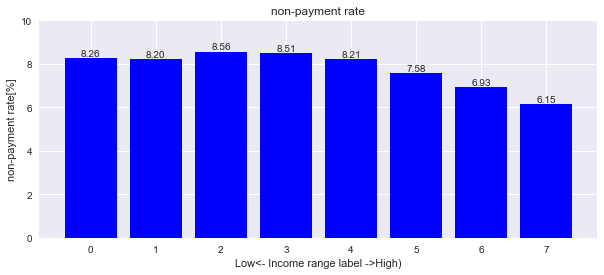

In [15]:
#ラベル毎に未返済率を算出
non_repayment_rate_w_income_range = data_to_use.groupby("Income_range_label", as_index=False).mean()
non_repayment_rate_w_income_range["TARGET"] *= 100
print("Income range毎の未返済率[%](Target列)=\n{}".format(non_repayment_rate_w_income_range))

#Bar plot
plt.figure(figsize=(10,4))
plt.bar(non_repayment_rate_w_income_range["Income_range_label"]
        , non_repayment_rate_w_income_range["TARGET"], color="Blue")
plt.xlabel('Low<- Income range label ->High)')
plt.ylabel('non-payment rate[%]')
plt.ylim(0,10)
plt.title("non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_income_range["Income_range_label"]
                ,non_repayment_rate_w_income_range["TARGET"]):
    plt.text( x, y, str("{:.2f}").format(y), ha='center', va='bottom')
plt.show()

#repayment_rate_w_income_range.plot.bar()
#sb.plot(x="Income_range_label", data=repayment_rate_w_income_range)

直感的に予想したのは”収入が低い人ほど未返済率が高い”だったがraneg=0~4で大きな差はなかった。僅差だがrange=2,3のサンプル内の平均収入に近いグループの未返済率が一番高い。  range=6,7の相対的に高収入なグループの未返済率は予想される通り低い。  
未返済率の差は最大、最小で約2.4%程である。  
予想したほどの大きいな差はなかったが返済率を予測する際にIncome("AMT_INCOME_TOTAL")は特徴量になり得そうである。

##### 課題2. "NAME_HOUSING_TYPE, OCCUPATION_TYPE"と返済率の関係 
手順  
1.NAME_HOUSING_TYPE, OCCUPATION_TYPEをについて、ラベル毎に返済率を算出  
2.返済率の関係をグラフ化し関係を調べる  

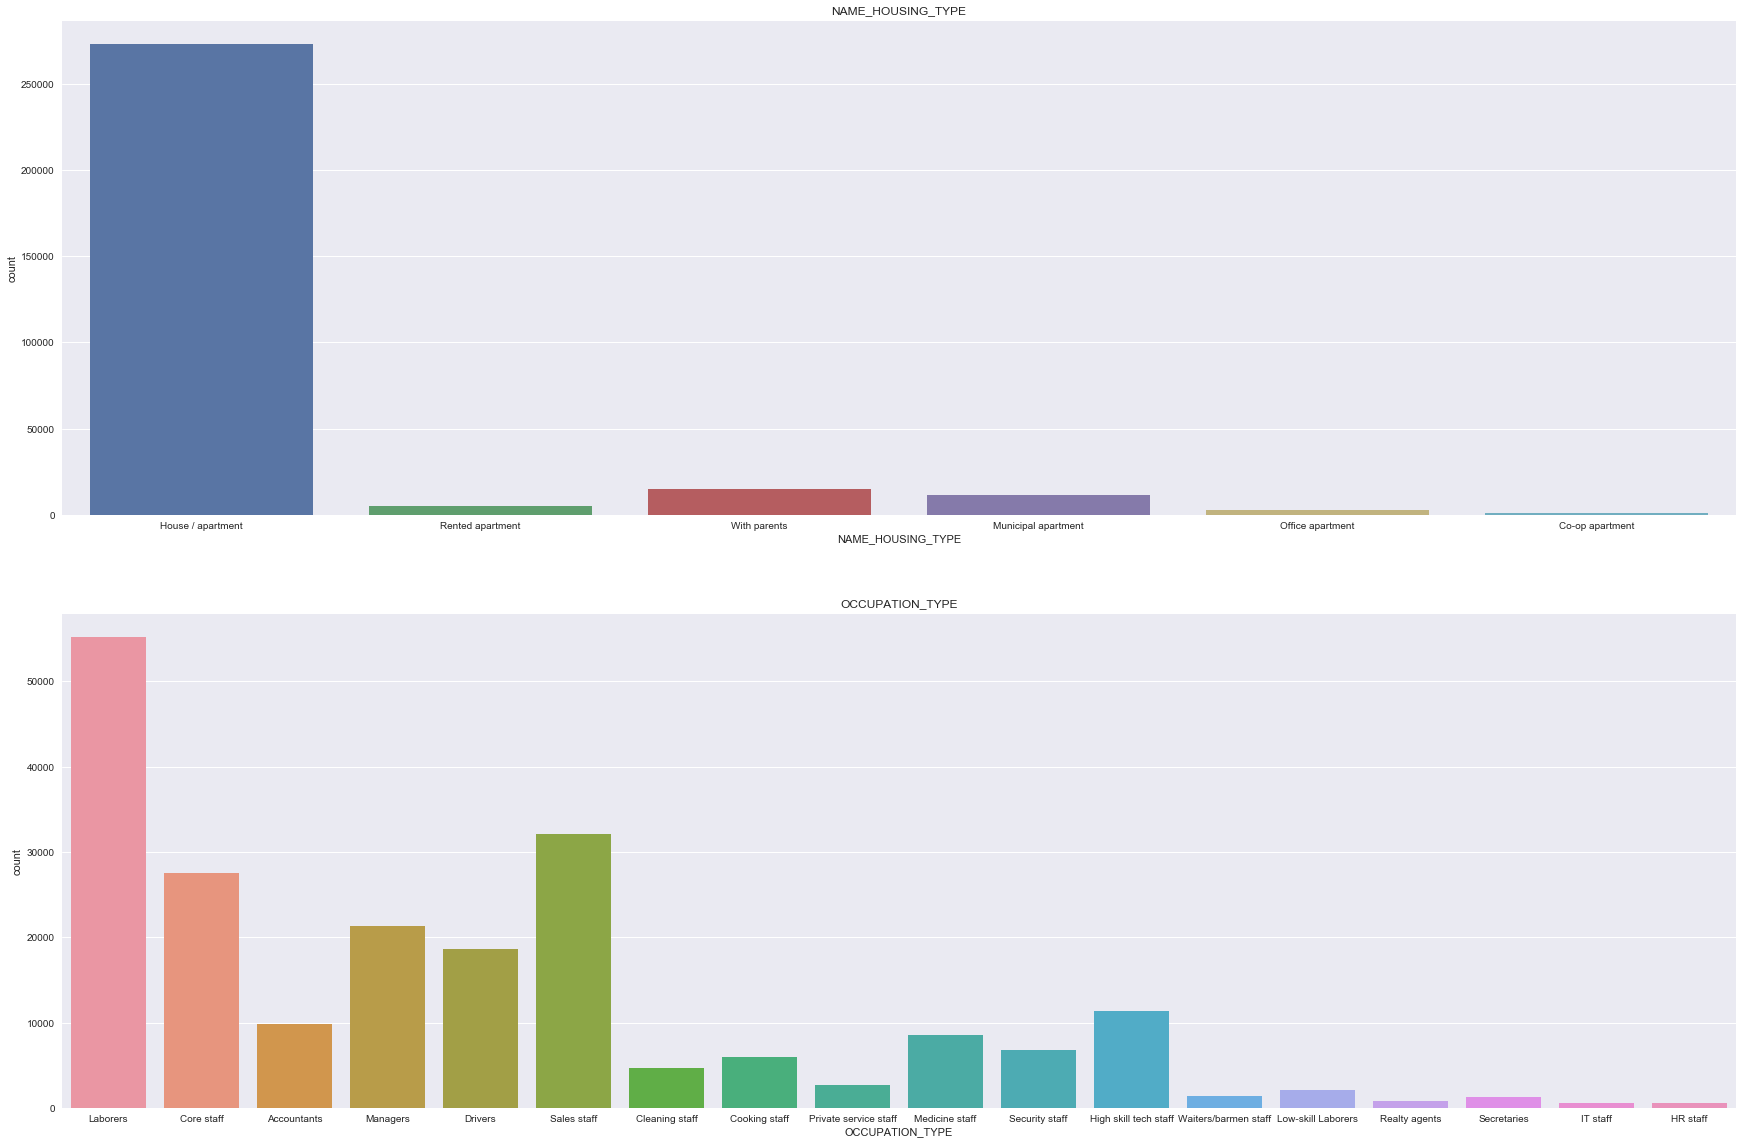

In [22]:
#先ずは各パラメータの内訳と分布を見てみる
#label = data_to_use["NAME_FAMILY_STATUS"]
#data = [len(df[col_name[i]]) for i in range(0,len(df.columns))]
#sb.countplot(x="NAME_FAMILY_STATUS", data=data_to_use)

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
sb.countplot(data_to_use.loc[:,"NAME_HOUSING_TYPE"])
plt.title("NAME_HOUSING_TYPE")
    
plt.subplot(2,1,2)
sb.countplot(data_to_use.loc[:,"OCCUPATION_TYPE"])
plt.title("OCCUPATION_TYPE")
plt.subplots_adjust(wspace=0.2, hspace=0.2)

###### Housing type
利用者のほとんどがHouse/Apartmentに住んでいる。
###### Occupation type
Laborsのローン利用者が多い

     NAME_HOUSING_TYPE     TARGET  AMT_INCOME_TOTAL
0      Co-op apartment   7.932264     167651.322193
1    House / apartment   7.795711     169227.717311
2  Municipal apartment   8.539748     168002.934007
3     Office apartment   6.572411     187906.542988
4     Rented apartment  12.313051     167460.213891
5         With parents  11.698113     158651.069555


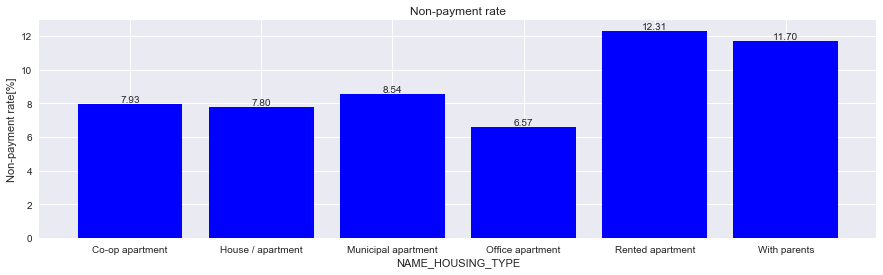

In [18]:
#ラベル毎に返済率を算出
non_repayment_rate_w_housing_type = data_to_use.groupby("NAME_HOUSING_TYPE", as_index=False).mean()
non_repayment_rate_w_housing_type["TARGET"] *= 100
print(non_repayment_rate_w_housing_type)

#Bar plot
plt.figure(figsize=(15,4))
plt.bar(non_repayment_rate_w_housing_type.index, non_repayment_rate_w_housing_type["TARGET"], color="Blue")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_housing_type.index, non_repayment_rate_w_housing_type["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_housing_type.index, non_repayment_rate_w_housing_type["NAME_HOUSING_TYPE"]) #x軸を実際のデータラベルへ置き換え
plt.show()

"HOUSING TYPE"については

          OCCUPATION_TYPE     TARGET  AMT_INCOME_TOTAL
0             Accountants   4.830327     194578.357842
1          Cleaning staff   9.606705     130790.895551
2           Cooking staff  10.443996     138396.508176
3              Core staff   6.303954     172656.695254
4                 Drivers  11.326130     187011.606413
5                HR staff   6.394316     188916.282416
6   High skill tech staff   6.159930     182842.045683
7                IT staff   6.463878     213465.601711
8                Laborers  10.578770     166357.482525
9      Low-skill Laborers  17.152413     133228.001911
10               Managers   6.214028     260336.681717
11         Medicine staff   6.700246     149709.643434
12  Private service staff   6.598793     182334.812783
13          Realty agents   7.856192     195003.994674
14            Sales staff   9.631799     152302.874710
15            Secretaries   7.049808     160541.662069
16         Security staff  10.742449     149662.695953
17   Waite

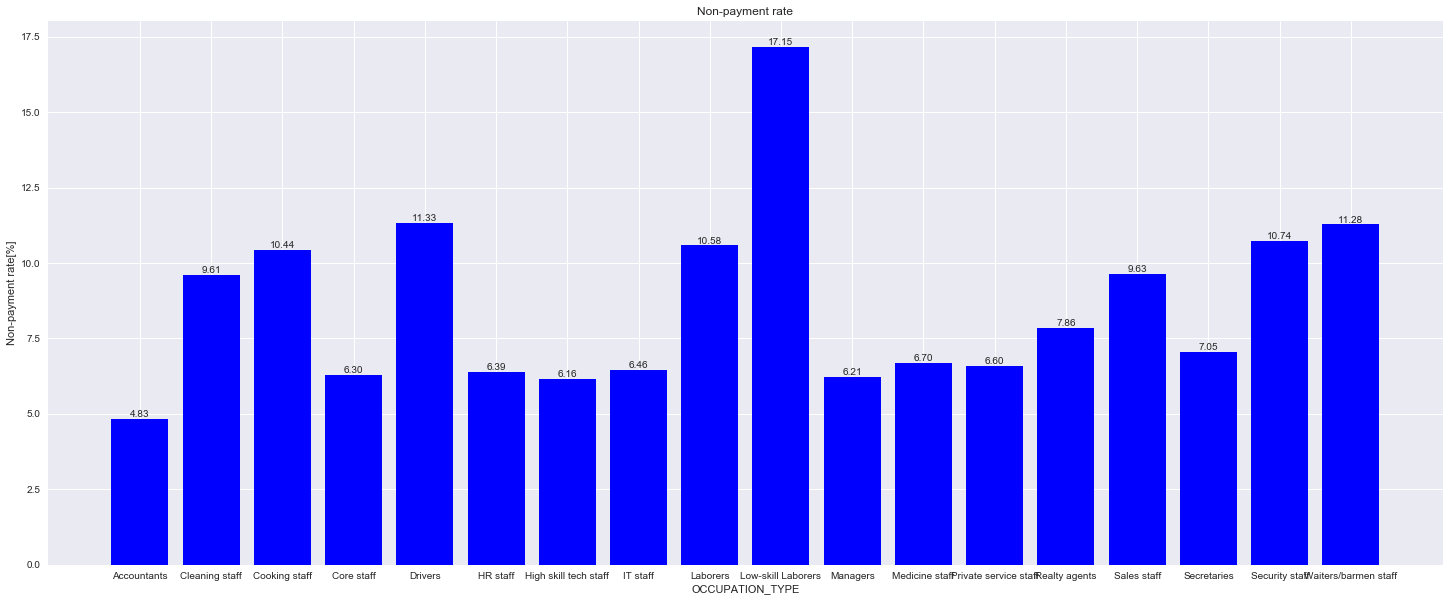

In [19]:
#ラベル毎に返済率を算出
non_repayment_rate_w_occupation = data_to_use.groupby("OCCUPATION_TYPE", as_index=False).mean()
non_repayment_rate_w_occupation["TARGET"] *= 100
#non_repayment_rate_w_occupation["OCCUPATION_TYPE_LABEL"] = [i for i in range(0, len(non_repayment_rate_w_occupation))]
print(non_repayment_rate_w_occupation)

#Bar plot
plt.figure(figsize=(25,10))
plt.bar(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"], color="Blue")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["OCCUPATION_TYPE"]) #x軸を実際のデータラベルへ置き換え
plt.show()

Labor（肉体労働のような）の未返済率が高く特にlow-skill laborは突出して高い。  
それに続いてウェイターやドライバー、セキュリティーなど比較的特別な教育の必要ない職業に従事する者の未返済率が高い。（学歴も特徴量になり得そう） 
未返済率が最も低いのは会計士で、流石に金銭関係には真面目なようだ。
以上のように、未偏差率に明らかな差が現れているため、職業”OCCUPATION_TYPE”は特徴量として重要そうだ。

職業は収入と関係のありそうな量であるが、未返済率の特徴は収入の高低よりも職業別の方がよく表れているように見える。（収入よりもその人間の社会的な役割や責任？によって返済率が変わりそうだ。）

###### 課題3. 各パラメータに対する重要度の算出を行う（Pick upした３つの説明変数以外に重要なパラメータを探し出す）

#### 【問題5】（アドバンス課題）カーネルへの投稿
Kaggleのカーネルに今回行ったEDAを投稿してみましょう。英語の文章を書くことが難しい場合は、機械翻訳サービスを活用するなどでも構いません。